In [2]:
import pandas as pd
import numpy as np
import os
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from matplotlib import pyplot as plt
from sklearn.metrics import silhouette_samples, silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn import datasets

In [3]:
from kneed import KneeLocator

In [3]:
# to check the working directory
os.getcwd()

'C:\\Users\\Dell\\OneDrive - Institute of Business Administration\\Desktop\\IDM Challenge 3'

In [4]:
data = pd.read_csv("Data.csv")

In [5]:
print(data.shape)

(2783, 133)


In [6]:
data

,row ID,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,...,pus_filled_pimples,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze
0,Row0,0,0,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,Row1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,Row2,0,0,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
3,Row3,0,0,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
4,Row4,0,0,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2778,Row2778,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2779,Row2779,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2780,Row2780,0,1,0,0,0,0,0,0,0,...,1,1,1,0,0,0,0,0,0,0
2781,Row2781,0,1,0,0,0,0,1,0,0,...,0,0,0,1,1,1,1,0,0,0


In [7]:
# Create correlation matrix
corr_matrix = data.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find features with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]

# Drop features 
data.drop(to_drop, axis=1, inplace=True)

C:\Users\Dell\AppData\Local\Temp\ipykernel_5552\3266394134.py:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))


In [8]:
data

,row ID,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,...,pus_filled_pimples,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze
0,Row0,0,0,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,Row1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,Row2,0,0,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
3,Row3,0,0,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
4,Row4,0,0,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2778,Row2778,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2779,Row2779,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2780,Row2780,0,1,0,0,0,0,0,0,0,...,1,1,1,0,0,0,0,0,0,0
2781,Row2781,0,1,0,0,0,0,1,0,0,...,0,0,0,1,1,1,1,0,0,0


In [9]:
kcluster = data.drop(columns='row ID')

In [25]:
lst=[]
for column in kcluster.columns:
    if(kcluster[column].var()==0):
        #lst.append[column]
        print(column)

nodal_skin_eruptions
continuous_sneezing
shivering
muscle_wasting
burning_micturition
spotting_ urination
anxiety
patches_in_throat
irregular_sugar_level
pain_behind_the_eyes
constipation
fluid_overload
throat_irritation
redness_of_eyes
sinus_pressure
runny_nose
congestion
pain_during_bowel_movements
pain_in_anal_region
bloody_stool
irritation_in_anus
cramps
bruising
obesity
swollen_legs
swollen_blood_vessels
extra_marital_contacts
drying_and_tingling_lips
slurred_speech
weakness_of_one_body_side
loss_of_smell
bladder_discomfort
foul_smell_of urine
continuous_feel_of_urine
toxic_look_(typhos)
altered_sensorium
red_spots_over_body
belly_pain
dischromic _patches
watering_from_eyes
increased_appetite
polyuria
lack_of_concentration
prominent_veins_on_calf
palpitations


In [26]:
kmeans = KMeans(init="k-means++", n_clusters=6, random_state=0)
kmeans.fit(kcluster)

KMeans(n_clusters=6, random_state=0)

In [27]:
agg = AgglomerativeClustering(n_clusters=11, affinity='manhattan', linkage='average')
agg = agg.fit(kcluster)

In [28]:
s_avg = []
for k in range(2, 50):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(kcluster)
    sil_sc = silhouette_score(kcluster, kmeans.labels_)
    s_avg.append(sil_sc)
print(s_avg)

[0.17386854982516037, 0.2128816768970827, 0.1976207131783798, 0.24463594649004655, 0.2787367793608516, 0.3142553124319116, 0.3235413346596742, 0.36450294666634797, 0.4013136099935605, 0.41983874920919234, 0.4532704095392343, 0.48525403103023995, 0.5156925836929035, 0.5387782078468781, 0.5753314703738981, 0.5991096986858249, 0.6389191091818215, 0.6687060435715476, 0.6957725556651385, 0.7257290079604428, 0.7487361983012905, 0.7523009934934568, 0.7430266268199603, 0.7390969961127758, 0.7288961159289784, 0.7352800724073328, 0.7085820806720006, 0.699321625550185, 0.7305162263010048, 0.7028900142030698, 0.7376224240958905, 0.7078214394646792, 0.670323572299913, 0.719248614538559, 0.7145568011597518, 0.6877533791122962, 0.6694038013796906, 0.6850599264922693, 0.6720765142324617, 0.7001188889286113, 0.6742772504419632, 0.6873717045947549, 0.644371940425101, 0.6485454603312003, 0.6829258627932324, 0.6657199413925221, 0.6519361510416886, 0.6704567134008164]


In [29]:
silhouette_avg = silhouette_score(kcluster, kmeans.fit_predict(kcluster))
print("For n_clusters =", 50, "The average silhouette_score is :", silhouette_avg)

# Compute the silhouette scores for each sample
#sample_silhouette_values = silhouette_samples(X, new_labels2)

For n_clusters = 50 The average silhouette_score is : 0.6942783468887814


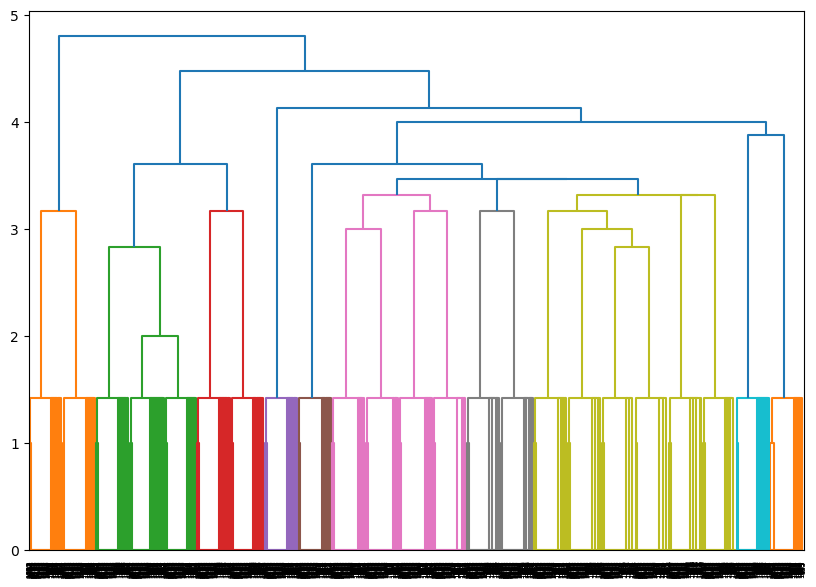

In [30]:
linked = linkage(kcluster, 'complete')

labelList = range(1, 150)

plt.figure(figsize=(10, 7))
dendrogram(linked) ,
#            orientation='top',
#            labels=labelList,
#            distance_sort='descending',
#            show_leaf_counts=True)
plt.show()

In [31]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(kcluster)

In [32]:
km = KMeans(n_clusters =6)
km.fit(scaled_features)
new_labels = km.labels_

In [33]:
km.inertia_

145400.8583465262

In [34]:
sse = []
for k in range(2, 50):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(scaled_features)
    sse.append(kmeans.inertia_)

Text(0.5, 1.0, 'Elbow curve')

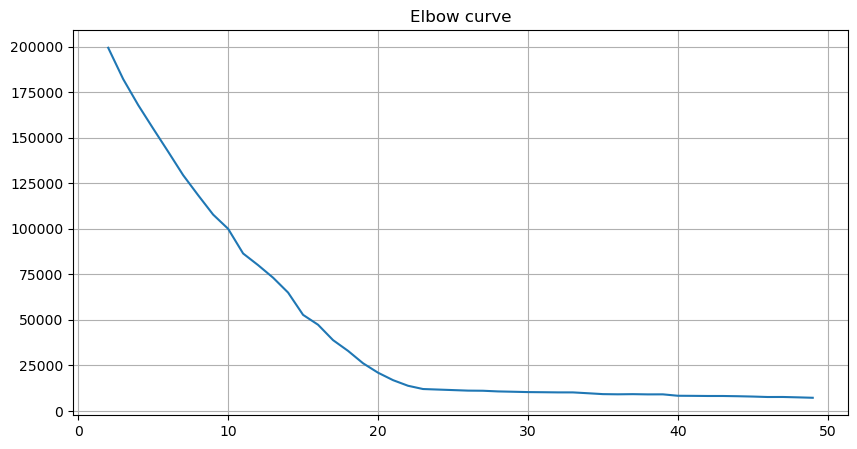

In [35]:
fig = plt.figure(figsize=(10, 5))
plt.plot(range(2, 50), sse)
plt.grid(True)
plt.title('Elbow curve')

In [36]:
kl = KneeLocator(range(2, 50), sse, curve="convex", direction="decreasing")
kl.elbow

20

In [37]:
#prediction = kmeans.fit_predict(kcluster)
prediction = agg.fit_predict(kcluster)

In [38]:
write = data[['row ID']]
write ['cluster'] = prediction
write.to_csv('output.csv', index = False)

C:\Users\Dell\AppData\Local\Temp\ipykernel_5552\1729615899.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  write ['cluster'] = prediction
